# TITANIC DATASET ANALYSIS

#### Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Load the dataset into a dataframe

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Data description

We can use the `describe()` method to get a summary of the numerical attributes of the dataset. This will help us to understand the data better.

In [3]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


The `info()` method will give us a concise summary of the dataframe, including the number of non-null values in each column as well as the data type of each column.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In order to understand what features we may have to clean, as there might be missing values, we can use the code below to get the percentage of NaN values in each column.

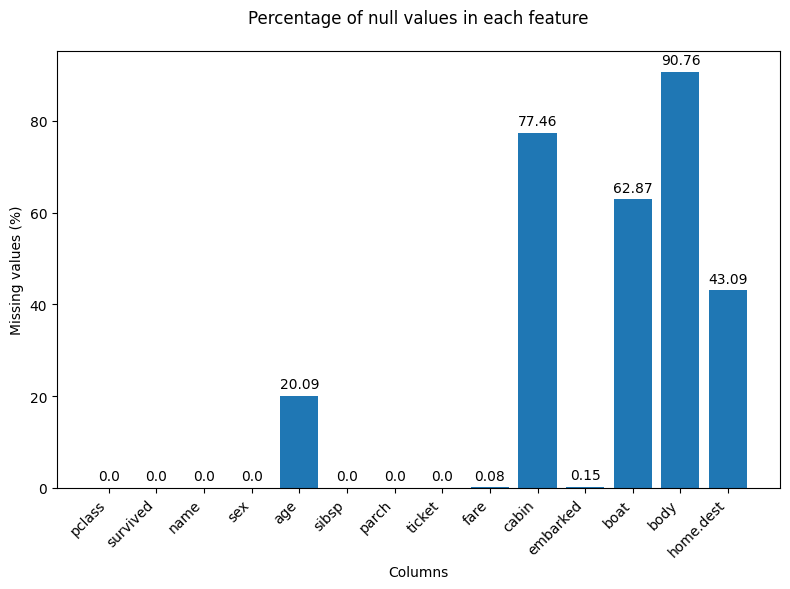

In [5]:
# Calculate the percentage of missing values in each column
missing_data = data.isna().sum() / len(data) * 100

# Create a bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(missing_data.index, missing_data.values)
plt.title('Percentage of null values in each feature', pad=20)
plt.xlabel('Columns')
plt.ylabel('Missing values (%)')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### NaN values
Upon reviewing the dataset, we noted a significant number of NaN values in the `body`, `boat`, and `cabin` columns. Given their high percentage of NaN values, we decided to drop these columns as they wouldn't contribute meaningfully to our analysis. Although the `age`, `home.dest`, `embarked` and `fare` columns also contain a some missing data, falling under 50%, we needed to think how we would handle them. We resolved to drop the `home.dest` column due to its limited relevance to our analysis. For the `age` and `fare` columns, we chose to turn the NaN values into the mean of the column and for the `embarked`column we decided to populate those NaN values with the most frequent value in the column.

##### Data cleaning
After addressing the features with a significat percentage of NaN values, we turned our attention to the other columns. Upon consideration, we determined that the `name` column served no significant purpose for our analysis decideding to drop it. Similarly, we chose to remove the `ticket` column as it merely serves as a unique identifier for each passenger and does not offer valuable insights. Additionally, recognizing the presence of categorical features, we proceeded to convert them into numerical values using the `get_dummies()` method. Specifically, the `sex` and `embarked` columns were converted into multiple boolean columns. For the `sex` column, it created two new columns: `sex_male` and `sex_female`, where a `true` represents the presence of that category and a `false` represents the absence. Similarly, for the `embarked` column, it created three new columns: `embarked_C`, `embarked_Q`, and `embarked_S`, each representing one of the original categories.

In [6]:
# Changing the Nan values in the age, fare and embarked columns to the mean of the column
data.fillna({'age': data['age'].mean(), 'fare': data['fare'].mean(), 'embarked': data['embarked'].mode()[0]}, inplace=True)

# Dropping the body, boat, cabin and home.dest columns
processed_data = data.drop([
    'boat', 
    'body', 
    'cabin', 
    'home.dest',
    'name',
    'ticket'
], axis=1) 


processed_data = pd.get_dummies(processed_data)
processed_data.head()


,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.00,0,0,211.3375,True,False,False,False,True
1,1,1,0.92,1,2,151.5500,False,True,False,False,True
2,1,0,2.00,1,2,151.5500,True,False,False,False,True
3,1,0,30.00,1,2,151.5500,False,True,False,False,True
4,1,0,25.00,1,2,151.5500,True,False,False,False,True


Although the dataset was basically clean, we still made some changes. We needed to drop one of `sex_male` and `sex_female` columns to avoid multicollinearity as they are inversely related and we also decided to merge `sibsp` and `parch` columns into a single column called `family` that represents the number of family members on board.

In [7]:
processed_data['family'] = processed_data['sibsp'] + processed_data['parch']

processed_data = processed_data.drop([
    'sex_male',
    'sibsp',
    'parch'
], axis=1)


processed_data.head()


,pclass,survived,age,fare,sex_female,embarked_C,embarked_Q,embarked_S,family
0,1,1,29.00,211.3375,True,False,False,True,0
1,1,1,0.92,151.5500,False,False,False,True,3
2,1,0,2.00,151.5500,True,False,False,True,3
3,1,0,30.00,151.5500,False,False,False,True,3
4,1,0,25.00,151.5500,True,False,False,True,3


So in order to understand how those features are related to the survival rate, we ploted a graph to show how the features are distributaded based on the survival rate.

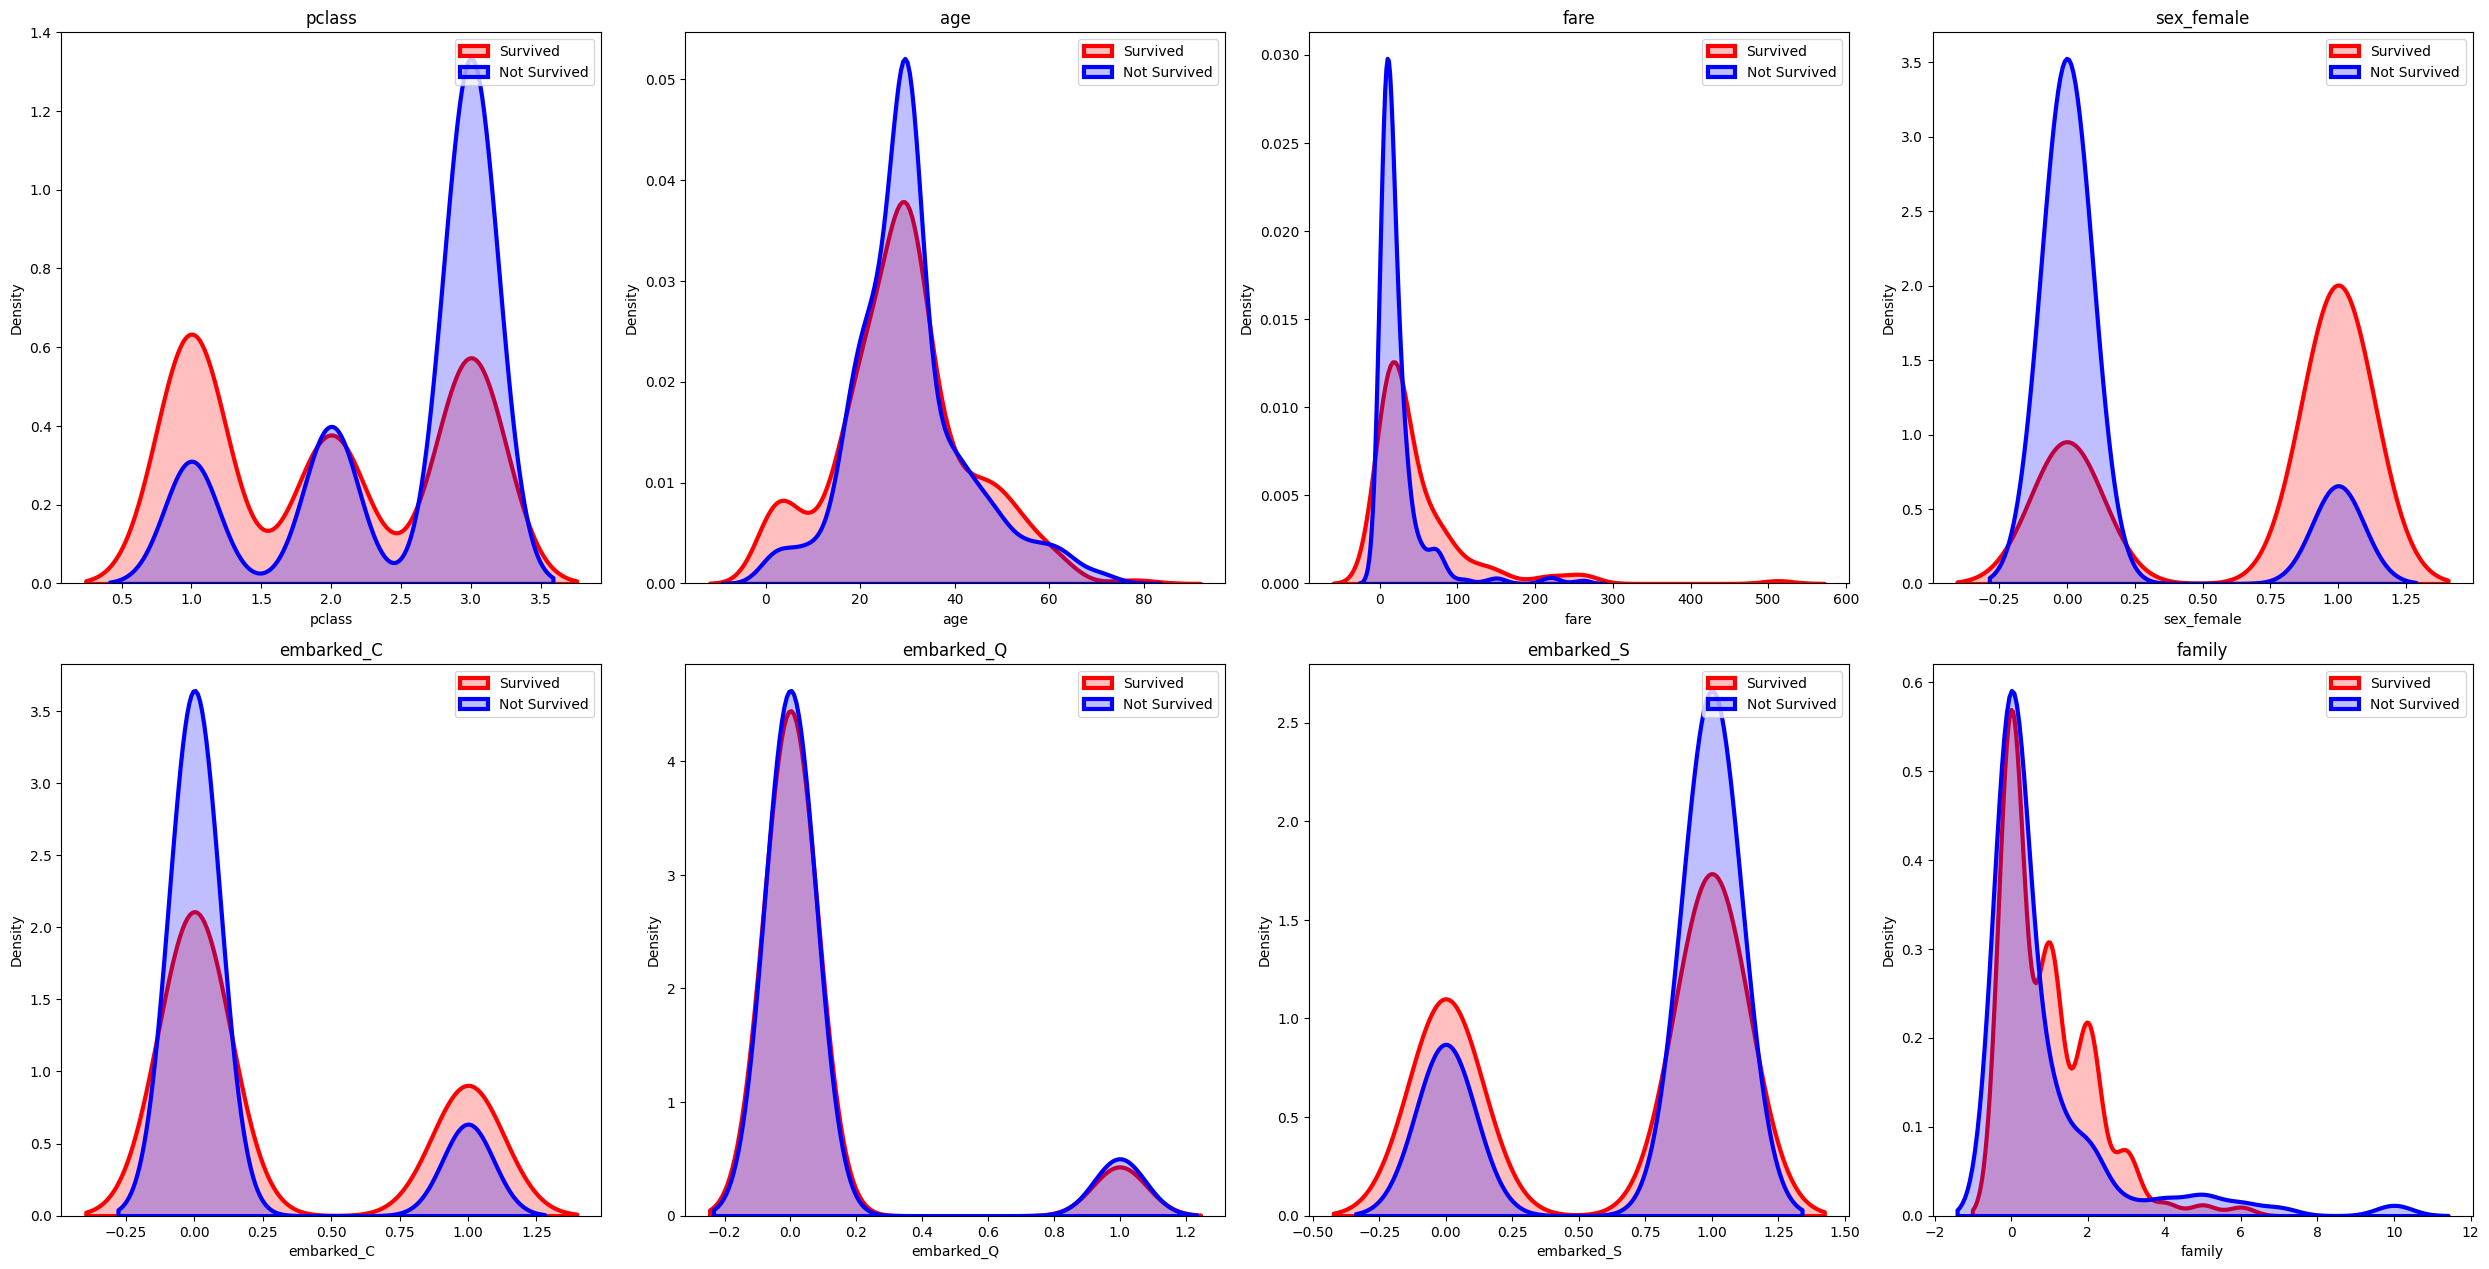

In [8]:
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Create dataframes for survived and not survived
pd1 = processed_data[processed_data['survived']==1].drop(['survived'],axis=1)
pd2 = processed_data[processed_data['survived']==0].drop(['survived'],axis=1)

for i, col in enumerate(list(pd1.columns)):
    plt.subplot(4, 4, i+1)
    
    # Use seaborn kdeplot which allows you to draw a line at the mean
    sb.kdeplot(pd1[col], fill=True, linewidth=3, color='red', label='Survived')
    sb.kdeplot(pd2[col], fill=True, linewidth=3, color='blue', label='Not Survived')
    
    plt.legend(prop={'size': 10})
    plt.title(col)

plt.tight_layout()
plt.show()

Now to verify numerically the correlation between the features and the survival rate, we used the `corr()` method to calculate the correlation between the features and the target variable. We then plotted a heatmap to visualize the correlation between the features and the target variable.

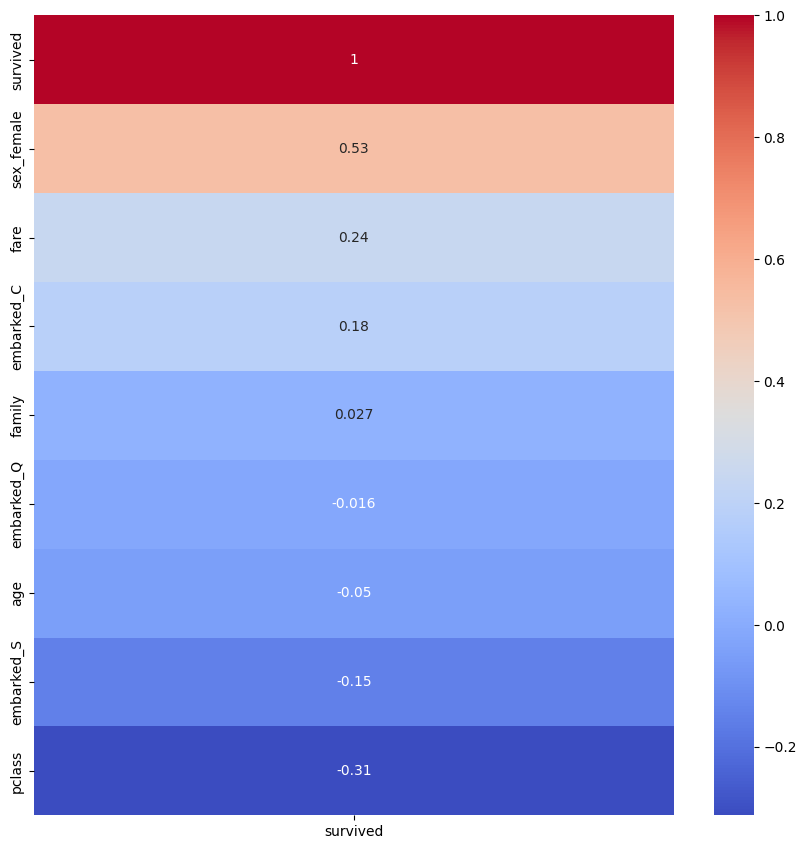

In [9]:
cols = list(processed_data.columns)
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

corr = processed_data.corr()[['survived']].sort_values(by='survived', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The heatmap made above show the correlation, numerically, between the features and the target variable. A positive value indicates that when the feature increases, the target variable also increases. A negative value indicates that when the feature increases, the target variable decreases. A value of 0 indicates no correlation between the feature and the target variable.

#### Data analysis

In [10]:
# Splitting the data into features and target
X = processed_data.drop('survived', axis=1)
y = processed_data['survived']

##### Train-test split



In [11]:
unique, counts = np.unique(y, return_counts=True)
result = dict(zip(unique, counts))
print(result)

{0: 809, 1: 500}


Before proceeding with the analysis, we split the data into training and testing sets. We used the `train_test_split()` method from the `sklearn.model_selection` module to split the data into 80% training and 20% testing sets. This allowed us to train our model on the training set and evaluate its performance on the testing set. Also we defined `random_state = 42` to ensure reproducibility of the results. Also we have defined a stratify parameter to ensure that the distribution of the target variable is the same in both the training and testing sets as our set is unbalanced.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In order to evaluate how well our model performs, we used the `accuracy_score()` method from the `sklearn.metrics` module. This method calculates the accuracy of the model by comparing the predicted values with the actual values in the testing set.

##### Logistic regression

A `Logistic regression` is a supervised machine learning algorithm used for binary classification problems. It predicts the probability of an instance belonging to a particular class. In our case, we used logistic regression to predict whether a passenger survived the Titanic disaster or not. We trained a logistic regression model on the training data and evaluated its performance on the testing data.

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8206106870229007


##### Decision tree

A `Decision tree` is a non-parametric supervised learning method used for classification and regression. It creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.


In [47]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7862595419847328


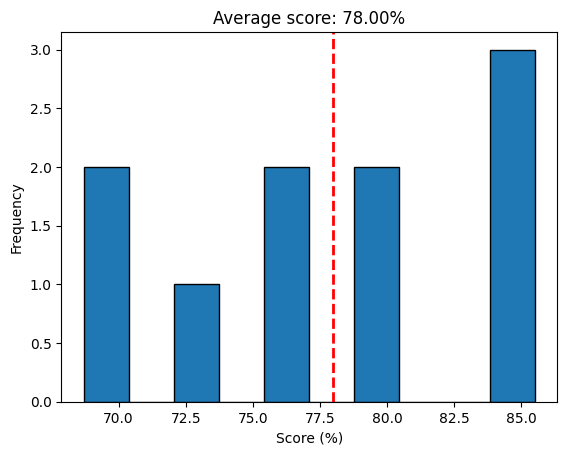

In [48]:
n_splits = 10

decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=n_splits) * 100

average_score = np.mean(cv_scores)

# Create a histogram of the cross-validation scores
plt.hist(cv_scores, edgecolor='black')
plt.title(f'Average score: {average_score:.2f}%')
plt.xlabel('Score (%)')
plt.ylabel('Frequency')
plt.axvline(average_score, color='r', linestyle='dashed', linewidth=2)  # Add a vertical line at the average score
plt.show()

Best score: 0.7799706400469758
Best parameters: {'max_depth': 1, 'max_features': 8}


Text(50.722222222222214, 0.5, 'max_depth')

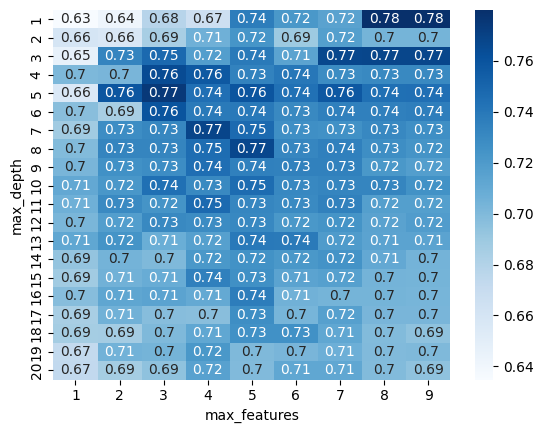

In [49]:

from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV( decision_tree_classifier, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(X, y)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (20, 9)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(9) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(20) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

##### Random forest

A `Random forest` is an learning method that combines the predictions of multiple decision trees to improve the accuracy and robustness of the model. It creates a forest of decision trees and aggregates their predictions to make a final prediction.


In [69]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7862595419847328
